<a href="https://www.kaggle.com/code/hashemi221022/comprehensive-bioinformatics-pdb-cif-analysis?scriptVersionId=239237481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center style="font-family:newtimeroman;font-size:150%; border-radius:50px; padding: 20px; color: yellow; background-color: black">Bioinformatics-PDB And CIF format files Analysis And Visualization</center></h1>
<center>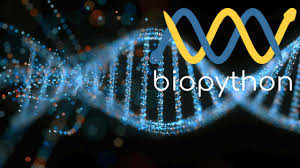</center><br>


In [1]:
#!pip install Bio
#!pip install nglview

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">1. The First Step | Import Requier Library</p>

In [2]:
# Import required libraries
from Bio.PDB.MMCIFParser import MMCIFParser
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB import NeighborSearch
from Bio.PDB import PDBList
import pandas as pd
import nglview as nv
import requests
import shutil
import os

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">2. The Second Step | Make Directory and Download/preparation Data</p>

In [3]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Show all the file that is exist in directory
os.listdir()

['__notebook__.ipynb']

In [5]:
# Create a new directory
os.mkdir("pdb_files")

In [6]:
# Show all the file that is exist in directory
os.listdir()

['pdb_files', '__notebook__.ipynb']

In [7]:
# Dowanload 2v0z.cif file
pdb_list = PDBList() # Create PDBList class
pdb_id = "2v0z" # pdb id
pdb_file = pdb_list.retrieve_pdb_file(pdb_id, pdir= "pdb_files",file_format="mmCif") # Dowanload cif file
print(pdb_file) # Show info

pdb_files/2v0z.cif


In [8]:
# Dowanload 2v0z.ent file
pdb_list = PDBList() # Create PDBList class
pdb_id = "2v0z" # pdb id
pdb_filename = pdb_list.retrieve_pdb_file(pdb_id, pdir= "pdb_files", file_format="pdb") # Dowanload cif file
print(pdb_filename)  # Show info

pdb_files/pdb2v0z.ent


In [9]:
def download_pdb_file(pdb_id, output_dir):
    """Downloads the .pdb file for a given PDB ID.

    Args:
        pdb_id (str): The PDB ID of the structure to download.
        output_dir (str): The directory to save the downloaded .pdb file.
    """
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)

    if response.status_code == 200:
        with open(f"{output_dir}/{pdb_id}.pdb", "wb") as file:
            file.write(response.content)
        print(f"Downloaded {pdb_id}.pdb to {output_dir}")
    else:
        print(f"Failed to download {pdb_id}.pdb")
        
pdb_id = "2v0z"
output_directory = "pdb_files"
download_pdb_file(pdb_id, output_directory)

Downloaded 2v0z.pdb to pdb_files


In [10]:
# make a ent file Path
path_of_ent_file = os.path.join("/kaggle/working/pdb_files", "pdb2v0z.ent")
print(path_of_ent_file)

/kaggle/working/pdb_files/pdb2v0z.ent


In [11]:
# make a cif file Path
path_of_cif_file = os.path.join("/kaggle/working/pdb_files", "2v0z.cif")
print(path_of_cif_file)

/kaggle/working/pdb_files/2v0z.cif


In [12]:
# make a pdb file Path
path_of_pdb_file = os.path.join("/kaggle/working/pdb_files", "2v0z.pdb")
print(path_of_pdb_file)

/kaggle/working/pdb_files/2v0z.pdb


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">3. The Third Step | Analysis PDB File By Python</p>

In [13]:
# Open and read file
with open(path_of_ent_file) as fp:
    data= fp.readlines()

In [14]:
# PDB file
for lines in data[:20]:
    print(lines)

HEADER    HYDROLASE                               21-MAY-07   2V0Z              

TITLE     CRYSTAL STRUCTURE OF RENIN WITH INHIBITOR 10 (ALISKIREN)              

CAVEAT     2V0Z    NAG C 1327 HAS WRONG CHIRALITY AT ATOM C1 NAG O 1328 HAS     

CAVEAT   2 2V0Z    WRONG CHIRALITY AT ATOM C1                                   

COMPND    MOL_ID: 1;                                                            

COMPND   2 MOLECULE: RENIN;                                                     

COMPND   3 CHAIN: C, O;                                                         

COMPND   4 SYNONYM: ANGIOTENSINOGENASE;                                         

COMPND   5 EC: 3.4.23.15;                                                       

COMPND   6 ENGINEERED: YES                                                      

SOURCE    MOL_ID: 1;                                                            

SOURCE   2 ORGANISM_SCIENTIFIC: HOMO SAPIENS;                                   

SOURCE   3 ORGAN

In [15]:
# File name
file_name = os.path.basename(path_of_ent_file)
pdb_id = file_name.split(".")[0]
print(f"The PDB ID is {pdb_id}")

The PDB ID is pdb2v0z


In [16]:
# How many line in the files?
print(f"There are {len(data)} lins in this file.")

There are 6695 lins in this file.


In [17]:
# get info()
header = data[0][10: ]
title = data[1][10: ]
print(f"Header : {header}")
print(f"Title : {title}")

Header : HYDROLASE                               21-MAY-07   2V0Z              

Title : CRYSTAL STRUCTURE OF RENIN WITH INHIBITOR 10 (ALISKIREN)              



In [18]:
# Find special info from data
# number of ligand
het_name =list() 
for lines in data:
    if "HETNAM" in lines and "REVDAT" not in lines:
        het_name.append(lines)
ligand_1 = het_name[1].split()[1]
ligand_2 = het_name[0].split()[1]
ligand_1_complete_name = het_name[1][10:]
ligand_2_complete_name = het_name[0][10:]
print(f"Hetrogen molecule 1 is {ligand_1} or it's complete name is {ligand_1_complete_name}")
print(f"Hetrogen molecule 2 is {ligand_2} or it's complete name is {ligand_2_complete_name}")


Hetrogen molecule 1 is C41 or it's complete name is  C41 ALISKIREN                                                        

Hetrogen molecule 2 is NAG or it's complete name is  NAG 2-ACETAMIDO-2-DEOXY-BETA-D-GLUCOPYRANOSE                         



In [19]:
# Find special info from data
# number of protein chains
chain_name =list() 
for lines in data:
    if "TER" in lines:
        chain_name.append(lines)
chain_o = chain_name[-2].split()[3]
chain_c = chain_name[-3].split()[3]
print(f"In this file 2 chain exist : Chain {chain_o} and chain {chain_c}")

In this file 2 chain exist : Chain O and chain C


In [20]:
# Find special info from data
# Find resolution
for lines in data:
    if "RESOLUTION." in lines:
        res_line = lines
        resolution = res_line.split()[3]
print(f"Resolution is {resolution} Angstrom")


Resolution is 2.20 Angstrom


In [21]:
# Find special info from data
# Find EC number
for lines in data:
    if "EC:" in lines:
        res_line = lines
        ec_number = res_line.split()[3][ :9]
print(f"EC Number of this protein is {ec_number}")

EC Number of this protein is 3.4.23.15


In [22]:
# Find special info from data
# Find source of protein
for lines in data:
    if "ORGANISM_SCIENTIFIC:" in lines:
        res_line = lines
        protein_source = res_line.split()[3] + ' ' + res_line.split()[4][:7]
print(f" Source of this protein : {protein_source}")

 Source of this protein : HOMO SAPIENS


In [23]:
# Find special info from data
# number of atom in each chains
chain_name =list() 
for lines in data:
    if "TER" in lines:
        chain_name.append(lines)
chain_o = chain_name[-2].split()[3]
cain_c = chain_name[-3].split()[3]
number_of_atoms = chain_name[-2].split()[4]
print(f"In this file 2 chain exist : {chain_o} with {number_of_atoms} atoms and chain {cain_c} with {number_of_atoms} atoms")

In this file 2 chain exist : O with 326 atoms and chain C with 326 atoms


In [24]:
# Find special info from data
# organism tax id
for lines in data:
    if "ORGANISM_TAXID:" in lines:
        res_line = lines
        organism_tax_id = res_line.split()[3][:4]
print(f"The ORGANISM TAXID is {organism_tax_id}")

The ORGANISM TAXID is 9606


In [25]:
# Find missing residues in the protein
for lines in data:
    if "REMARK 465" in lines:
        print(lines.strip()[10:])



 MISSING RESIDUES
 THE FOLLOWING RESIDUES WERE NOT LOCATED IN THE
 EXPERIMENT. (M=MODEL NUMBER; RES=RESIDUE NAME; C=CHAIN
 IDENTIFIER; SSSEQ=SEQUENCE NUMBER; I=INSERTION CODE.)

   M RES C SSSEQI
     ASN C   160A
     GLU O   160
     ASN O   160A
     SER O   160B


In [26]:
# Find missing atoms in the protein
for lines in data:
    if "REMARK 470" in lines:
        print(lines.strip()[10:])


 MISSING ATOM
 THE FOLLOWING RESIDUES HAVE MISSING ATOMS (M=MODEL NUMBER;
 RES=RESIDUE NAME; C=CHAIN IDENTIFIER; SSEQ=SEQUENCE NUMBER;
 I=INSERTION CODE):
   M RES CSSEQI  ATOMS
     SER C 159    CB   OG
     GLU C 160    CA   C    O    CB   CG   CD   OE1
     GLU C 160    OE2
     SER C 160B   OG
     GLN C 160C   CB   CG   CD   OE1  NE2
     SER O 159    CA   C    O    CB   OG


# <p style="background-color:black; font-family:calibri; color:#FFC133; font-size:120%; text-align:center; border-radius:30px 30px;">3_1. Create DataFrame </p>

In [27]:
# Create a DataFrame
data_file = {
   "Header" : header.split()[0],
    "Title" : title,
    "Pdb_id" : pdb_id,
    "Ligand name 1"  : ligand_1,
    "Ligand name 2" : ligand_2,
    "number of ligands" : 2,
    "Chain name 1" : chain_o,
    "Chain name 2" : chain_c,
    "number of chain" : 2,
    "resolution" : resolution,
    "EC Number" : ec_number,
    "Protein Source" : protein_source,
    "Chain atom" : number_of_atoms, 
    "Organism Tax Id" : organism_tax_id, 
    "MISSING RESIDUES" : "Yes"
}
df = pd.DataFrame(data_file, index=[1])
df

,Header,Title,Pdb_id,Ligand name 1,Ligand name 2,number of ligands,Chain name 1,Chain name 2,number of chain,resolution,EC Number,Protein Source,Chain atom,Organism Tax Id,MISSING RESIDUES
1,HYDROLASE,CRYSTAL STRUCTURE OF RENIN WITH INHIBITOR 10 (...,pdb2v0z,C41,NAG,2,O,C,2,2.20,3.4.23.15,HOMO SAPIENS,326,9606,Yes


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">4. The Forth Step | Analysis CIF File By Biopython</p>

In [28]:
# Create MMCIF2Dict class for convert cif file to dictionary
pdb_information = MMCIF2Dict(path_of_cif_file)


In [29]:
# Show keyes from dict file
for key in pdb_information.keys():
    print(key)

data_
_entry.id
_audit_conform.dict_name
_audit_conform.dict_version
_audit_conform.dict_location
_database_2.database_id
_database_2.database_code
_database_2.pdbx_database_accession
_database_2.pdbx_DOI
_pdbx_audit_revision_history.ordinal
_pdbx_audit_revision_history.data_content_type
_pdbx_audit_revision_history.major_revision
_pdbx_audit_revision_history.minor_revision
_pdbx_audit_revision_history.revision_date
_pdbx_audit_revision_details.ordinal
_pdbx_audit_revision_details.revision_ordinal
_pdbx_audit_revision_details.data_content_type
_pdbx_audit_revision_details.provider
_pdbx_audit_revision_details.type
_pdbx_audit_revision_details.description
_pdbx_audit_revision_details.details
_pdbx_audit_revision_group.ordinal
_pdbx_audit_revision_group.revision_ordinal
_pdbx_audit_revision_group.data_content_type
_pdbx_audit_revision_group.group
_pdbx_audit_revision_category.ordinal
_pdbx_audit_revision_category.revision_ordinal
_pdbx_audit_revision_category.data_content_type
_pdbx_audi

In [30]:
# Show entry id
print(pdb_information["_entry.id"])

['2V0Z']


In [31]:
# Show information for specific keyword.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_cell." in key: # Get data with keyword
            print(f"{key}: {value}") # Print

_cell.entry_id: ['2V0Z']
_cell.length_a: ['141.600']
_cell.length_b: ['141.600']
_cell.length_c: ['141.600']
_cell.angle_alpha: ['90.00']
_cell.angle_beta: ['90.00']
_cell.angle_gamma: ['90.00']
_cell.Z_PDB: ['24']


In [32]:
# Show information for specific keyword.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_entity." in key: # Get data with keyword
            print(f"{key}: {value}") # Show key and values

_entity.id: ['1', '2', '3', '4']
_entity.type: ['polymer', 'non-polymer', 'non-polymer', 'water']
_entity.src_method: ['man', 'man', 'syn', 'nat']
_entity.pdbx_description: ['RENIN', '2-acetamido-2-deoxy-beta-D-glucopyranose', 'ALISKIREN', 'water']
_entity.formula_weight: ['37267.008', '221.208', '551.758', '18.015']
_entity.pdbx_number_of_molecules: ['2', '2', '2', '685']


In [33]:
# Show information for specific keyword.
all_entities_descript = list() # List of value of the substance.
all_entities_weight = list() # List of value of the formula weight.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_entity.pdbx_descriptio" in key: # Get data with keyword
            all_entities_descript.append(value) # Add value to list
        if "_entity.formula_weight" in key: # Get data with keyword
            all_entities_weight.append(value) # Add value to list
water = "Yes" if "water" in  all_entities_descript[0] else "No"
# Print info
print(f"Protein: {all_entities_descript[0][0]} with {all_entities_weight[0][0]} formula weight")
print(f"Ligand 1: {all_entities_descript[0][1]} with {all_entities_weight[0][1]} formula weight")
print(f"Ligand 2: {all_entities_descript[0][2]} with {all_entities_weight[0][2]} formula weight")
print(f"Water: {water}")


Protein: RENIN with 37267.008 formula weight
Ligand 1: 2-acetamido-2-deoxy-beta-D-glucopyranose with 221.208 formula weight
Ligand 2: ALISKIREN with 551.758 formula weight
Water: Yes


In [34]:
# Show information for specific keyword.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_entity_src" in key: # Get data with keyword
            print(f"{key}: {value}") # Show key and values

_entity_src_gen.entity_id: ['1']
_entity_src_gen.pdbx_src_id: ['1']
_entity_src_gen.pdbx_alt_source_flag: ['sample']
_entity_src_gen.gene_src_common_name: ['HUMAN']
_entity_src_gen.pdbx_gene_src_scientific_name: ['HOMO SAPIENS']
_entity_src_gen.pdbx_gene_src_ncbi_taxonomy_id: ['9606']
_entity_src_gen.pdbx_host_org_scientific_name: ['CRICETULUS GRISEUS']
_entity_src_gen.pdbx_host_org_ncbi_taxonomy_id: ['10029']
_entity_src_gen.pdbx_host_org_cell_line: ['CHO']


In [35]:
# Show information for specific keyword.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_entity_src_gen.gene_src_common_name" in key: # Get data with keyword
            print(f"Common Name: {value[0]}") # Show key and values
        if "_entity_src_gen.pdbx_host_org_scientific_name" in key: # Get data with keyword
            print(f"Scientific Name: {value[0]}") # Show key and values
        if "_entity_src_gen.pdbx_gene_src_ncbi_taxonomy_id" in key: # Get data with keyword
            print(f"Taxonomy ID: {value[0]}") # Show key and values


Common Name: HUMAN
Taxonomy ID: 9606
Scientific Name: CRICETULUS GRISEUS


In [36]:
# Show information for specific keyword.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_entity_poly" in key: # Get data with keyword
            print(f"{key}: {value}") # Show key and values

_entity_poly.entity_id: ['1']
_entity_poly.type: ['polypeptide(L)']
_entity_poly.nstd_linkage: ['no']
_entity_poly.nstd_monomer: ['no']
_entity_poly.pdbx_seq_one_letter_code: ['LTLGNTTSSVILTNYMDTQYYGEIGIGTPPQTFKVVFDTGSSNVWVPSSKCSRLYTACVYHKLFDASDSSSYKHNGTELT\nLRYSTGTVSGFLSQDIITVGGITVTQMFGEVTEMPALPFMLAEFDGVVGMGFIEQAIGRVTPIFDNIISQGVLKEDVFSF\nYYNRDSENSQSLGGQIVLGGSDPQHYEGNFHYINLIKTGVWQIQMKGVSVGSSTLLCEDGCLALVDTGASYISGSTSSIE\nKLMEALGAKKRLFDYVVKCNEGPTLPDISFHLGGKEYTLTSADYVFQESYSSKKLCTLAIHAMDIPPPTGPTWALGATFI\nRKFYTEFDRRNNRIGFALAR']
_entity_poly.pdbx_seq_one_letter_code_can: ['LTLGNTTSSVILTNYMDTQYYGEIGIGTPPQTFKVVFDTGSSNVWVPSSKCSRLYTACVYHKLFDASDSSSYKHNGTELT\nLRYSTGTVSGFLSQDIITVGGITVTQMFGEVTEMPALPFMLAEFDGVVGMGFIEQAIGRVTPIFDNIISQGVLKEDVFSF\nYYNRDSENSQSLGGQIVLGGSDPQHYEGNFHYINLIKTGVWQIQMKGVSVGSSTLLCEDGCLALVDTGASYISGSTSSIE\nKLMEALGAKKRLFDYVVKCNEGPTLPDISFHLGGKEYTLTSADYVFQESYSSKKLCTLAIHAMDIPPPTGPTWALGATFI\nRKFYTEFDRRNNRIGFALAR']
_entity_poly.pdbx_strand_id: ['C,O']
_entity_poly_seq.entity_id: ['1', '1', 

In [37]:
# Show information for specific keyword.
for key, value in pdb_information.items(): # Get info
    if "?" not in value: # Remove empty values
        if "_entity_poly.pdbx_seq_one_letter_code" == key: # Get data with keyword
            # remove '\n'
            split_value = str(value[0]).split("\n")
            seq = "".join(split_value) # Join split values with a space
            # Show key and values
            print(f"Protein seq: {seq}")

Protein seq: LTLGNTTSSVILTNYMDTQYYGEIGIGTPPQTFKVVFDTGSSNVWVPSSKCSRLYTACVYHKLFDASDSSSYKHNGTELTLRYSTGTVSGFLSQDIITVGGITVTQMFGEVTEMPALPFMLAEFDGVVGMGFIEQAIGRVTPIFDNIISQGVLKEDVFSFYYNRDSENSQSLGGQIVLGGSDPQHYEGNFHYINLIKTGVWQIQMKGVSVGSSTLLCEDGCLALVDTGASYISGSTSSIEKLMEALGAKKRLFDYVVKCNEGPTLPDISFHLGGKEYTLTSADYVFQESYSSKKLCTLAIHAMDIPPPTGPTWALGATFIRKFYTEFDRRNNRIGFALAR


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">5. The Fifth Step | Atoms Analysis </p>

In [38]:
pdb_id = "2v0z" # pdb id
parser = MMCIFParser(QUIET=True) # Create MMCIFParser class for atom analysis
structure = parser.get_structure(pdb_id, path_of_cif_file) # Create structure

In [39]:
# Not : Just use one time for use more than one time you should run generator again.
atoms = structure.get_atoms() # Get atoms
type(atoms)

generator

In [40]:
atom_list = list(atoms) # List od atom
for atom in atom_list: # Get info
    if atom.element == "O": # Set specific atom
        oxigen_atom = atom # Atom name
        oxigen_coordinates = oxigen_atom.get_coord() # Atom coordinate
print(f"Coordinates of oxygen atom: X: {oxigen_coordinates[0]}, Y: {oxigen_coordinates[1]}, Z: {oxigen_coordinates[2]}")

Coordinates of oxygen atom: X: 36.07500076293945, Y: 15.322999954223633, Z: 90.21499633789062


In [41]:
# Find atoms
cutoff_distance = 5 # Distance
search_in_neighbor = NeighborSearch(atom_list) # Create NeighborSearch class for find nearby atoms
nearby_atoms = search_in_neighbor.search(oxigen_coordinates, cutoff_distance) # Search
# Print result
print(f"Number of oxigen atoms within {cutoff_distance} is {len(nearby_atoms)} neighboring atoms")
print()
for atom in nearby_atoms:
    print(f"Atom: {(str(atom))[6:-1]:5}  |  Element: {str(atom.element)}  |  Coordinates: {str(atom.coord)}") 

Number of oxigen atoms within 5 is 27 neighboring atoms

Atom: C16    |  Element: C  |  Coordinates: [32.106 14.158 88.409]
Atom: C20    |  Element: C  |  Coordinates: [32.838 12.868 87.99 ]
Atom: C21    |  Element: C  |  Coordinates: [34.356 12.895 88.264]
Atom: N22    |  Element: N  |  Coordinates: [34.995 14.058 87.596]
Atom: C23    |  Element: C  |  Coordinates: [35.036 11.575 87.838]
Atom: C25    |  Element: C  |  Coordinates: [36.49  11.552 88.3  ]
Atom: O      |  Element: O  |  Coordinates: [33.887 16.9   87.325]
Atom: C      |  Element: C  |  Coordinates: [34.56  17.169 86.33 ]
Atom: N      |  Element: N  |  Coordinates: [35.75  17.778 86.401]
Atom: CA     |  Element: C  |  Coordinates: [36.33  18.238 87.677]
Atom: C15    |  Element: C  |  Coordinates: [32.172 14.332 89.929]
Atom: OG1    |  Element: O  |  Coordinates: [33.253 13.587 93.655]
Atom: O      |  Element: O  |  Coordinates: [35.021 12.928 91.719]
Atom: C9     |  Element: C  |  Coordinates: [31.386 15.557 90.428]
Atom:

In [42]:
# Find residue
for atom in nearby_atoms: # Get info
    residue = atom.get_parent() # residue
    # Show info
    print(f"Residue Name: {residue.get_resname()}  |  Residue ID: {str(residue.get_id()[1]):5}  |  Atom: {atom.element}  |  Coordinations: {atom.coord}")

Residue Name: C41  |  Residue ID: 1327   |  Atom: C  |  Coordinations: [32.106 14.158 88.409]
Residue Name: C41  |  Residue ID: 1327   |  Atom: C  |  Coordinations: [32.838 12.868 87.99 ]
Residue Name: C41  |  Residue ID: 1327   |  Atom: C  |  Coordinations: [34.356 12.895 88.264]
Residue Name: C41  |  Residue ID: 1327   |  Atom: N  |  Coordinations: [34.995 14.058 87.596]
Residue Name: C41  |  Residue ID: 1327   |  Atom: C  |  Coordinations: [35.036 11.575 87.838]
Residue Name: C41  |  Residue ID: 1327   |  Atom: C  |  Coordinations: [36.49  11.552 88.3  ]
Residue Name: GLY  |  Residue ID: 217    |  Atom: O  |  Coordinations: [33.887 16.9   87.325]
Residue Name: GLY  |  Residue ID: 217    |  Atom: C  |  Coordinations: [34.56  17.169 86.33 ]
Residue Name: ALA  |  Residue ID: 218    |  Atom: N  |  Coordinations: [35.75  17.778 86.401]
Residue Name: ALA  |  Residue ID: 218    |  Atom: C  |  Coordinations: [36.33  18.238 87.677]
Residue Name: C41  |  Residue ID: 1327   |  Atom: C  |  Coor

In [43]:
# Find residue without specifc residue (oxigen_atom)
for atom in nearby_atoms:
    residue = atom.get_parent()
    if residue != oxigen_atom:
        print(f"Atom: {atom.element}  |  Residue Name: {residue.get_resname():5}|  Residue ID:{(residue.get_id()[1]):5}  |  Coordinations: {atom.coord}")

Atom: C  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: [32.106 14.158 88.409]
Atom: C  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: [32.838 12.868 87.99 ]
Atom: C  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: [34.356 12.895 88.264]
Atom: N  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: [34.995 14.058 87.596]
Atom: C  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: [35.036 11.575 87.838]
Atom: C  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: [36.49  11.552 88.3  ]
Atom: O  |  Residue Name: GLY  |  Residue ID:  217  |  Coordinations: [33.887 16.9   87.325]
Atom: C  |  Residue Name: GLY  |  Residue ID:  217  |  Coordinations: [34.56  17.169 86.33 ]
Atom: N  |  Residue Name: ALA  |  Residue ID:  218  |  Coordinations: [35.75  17.778 86.401]
Atom: C  |  Residue Name: ALA  |  Residue ID:  218  |  Coordinations: [36.33  18.238 87.677]
Atom: C  |  Residue Name: C41  |  Residue ID: 1327  |  Coordinations: 

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">6. The Sixth Step | Visualizations</p>

# <p style="background-color:black; font-family:calibri; color:#FFC133; font-size:120%; text-align:center; border-radius:30px 30px;">6_1. Visualization All Molecules </p>

<h1>Note:</h1> <h2>"This section must be run on your own system due to intractive visualization."</h2>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            background-color: #f4f4f9;
        }
        .representation {
            margin-bottom: 20px;
            padding: 15px;
            border: 1px solid #ddd;
            border-radius: 5px;
            background-color: #fff;
        }
        .representation h2 {
            margin-top: 0;
            color: #333;
        }
        .representation p {
            margin: 0;
            color: #555;
        }
    </style>
</head>
<body>
    <h1>Different Types of Protein Representations</h1>

<div class="representation">
        <h2>Cartoon</h2>
        <p>Displays the protein backbone as a cartoon-like ribbon, highlighting secondary structures such as alpha-helices and beta-sheets. This is useful for understanding the overall structure of the protein.</p>
</div>

<div class="representation">
    <h2>Ball+Stick</h2>
    <p>Shows atoms as balls and bonds as sticks, providing a detailed view of the atomic structure. This is ideal for examining small molecules or specific regions of the protein.</p>
</div>

<div class="representation">
    <h2>Licorice</h2>
    <p>Similar to Ball+Stick but with thinner bonds, emphasizing the connectivity between atoms.</p>
</div>

<div class="representation">
    <h2>Spacefill</h2>
    <p>Represents atoms as spheres with radii proportional to their van der Waals radii, giving a sense of the molecular volume.</p>
</div>

<div class="representation">
    <h2>Hyperball</h2>
    <p>A variation of Ball+Stick with exaggerated bonds, making it easier to see the connections in complex structures.</p>
</div>

<div class="representation">
    <h2>Surface</h2>
    <p>Displays the molecular surface, which is useful for visualizing the shape and accessible surface area of the protein.</p>
</div>

<div class="representation">
    <h2>Base</h2>
    <p>Highlights the base of nucleotides in DNA or RNA structures.</p>
    </div>
</body>
</html>

In [ ]:
# Show all molecules with ball+stick shape
view = nv.show_file(path_of_pdb_file)
view.clear_representations()
view.add_representation("ball+stick")   
view



In [ ]:
# Show all molecules with cartoon shape
view = nv.show_file(path_of_pdb_file)
view.clear_representations()
view.add_representation("cartoon")     
view

In [ ]:
# Show all molecules with licorice shape
view = nv.show_file(path_of_pdb_file)
view.clear_representations()
view.add_representation("licorice")
view

In [ ]:
# Show all molecules with spacefill shape
view = nv.show_file(path_of_pdb_file)
view.clear_representations()
view.add_representation("spacefill")
view

In [ ]:
# Show all molecules with hyperball shape
view = nv.show_file(path_of_pdb_file)
view.clear_representations()
view.add_representation("hyperball")
view

# <p style="background-color:black; font-family:calibri; color:#FFC133; font-size:120%; text-align:center; border-radius:30px 30px;">6_2. Visualization Base On Specific Part Of Molecules </p>

In [ ]:
# Show ligands
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("hyperball", "ligand")
view

In [ ]:
# Show protein
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("cartoon", "protein")
view

In [ ]:
# Show the protein and ligand in different shape
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("cartoon", "protein")
view.add_representation("hyperball", "ligand")
view

In [ ]:
# Show water
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("hyperball", "water")
view

In [ ]:
# Show the ligand and water
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("hyperball", "water")
view.add_representation("ball+stick", "ligand")
view

In [ ]:
# Show the protein and water
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("cartoon", "protein")
view.add_representation("hyperball", "water")
view

In [ ]:
# Show All The Molecules
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("surface", "protein", opacity=0.9)
view.add_representation("hyperball", "water", color="blue")
view.add_representation("ball+stick", "ligand", color="red")
view

In [ ]:
# Show the protein and ligand with different color
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("cartoon", "protein", color="blue", opacity=0.4)
view.add_representation("licorice", "ligand", color="red", opacity=0.9)
view

# <p style="background-color:black; font-family:calibri; color:#FFC133; font-size:120%; text-align:center; border-radius:30px 30px;">6_3. Visualization With Contacts </p>

In [ ]:
# Show the contact
view = nv.show_file(path_of_file)
view.clear_representations()
view.add_representation("cartoon", "protein", color="blue", opacity=0.4)
view.add_representation("licorice", "ligand", color="red", opacity=0.9)
view.add_representation("contact")
view

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">7. The Seventh Step | Save Image</p>

In [ ]:
# Create a new directory
os.mkdir("/kaggle/working/image")

In [ ]:
# render the image
view.render_image()

In [ ]:
# Download image
view.download_image("/kaggle/working/image/2v0z.png")

<center> 
<img style="border-radius: 200px 200px 200px 200px" src=https://static.vecteezy.com/system/resources/thumbnails/024/795/537/original/loop-thank-you-for-visiting-golden-light-motion-text-free-video.jpg height=500px width=900px border-radius=45%>
</center>